# Interpretabilitat

## Carreguem dades

In [6]:
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")


df_train = pd.read_csv('./datasets/data_train_class7.csv')
df_test = pd.read_csv('./datasets/data_test_class7.csv')

x_train = df_train.drop(columns=['is_recent'])
y_train = df_train['is_recent']

x_test = df_test.drop(columns=['is_recent'])
y_test = df_test['is_recent']

clss = ['Pre-2000', 'Post-2000']

data_columns = x_train.columns
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))
x_train.columns = x_test.columns = data_columns

x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
BPM,1395.0,0.456174,0.179555,0.0,0.318471,0.452229,0.557325,1.0
Energy,1395.0,0.583587,0.229908,0.0,0.401042,0.604167,0.770833,1.0
Danceability,1395.0,0.500500,0.179877,0.0,0.383721,0.500000,0.627907,1.0
Loudness,1395.0,0.723097,0.145117,0.0,0.640000,0.760000,0.840000,1.0
Liveness,1395.0,0.175110,0.169782,0.0,0.072165,0.103093,0.216495,1.0
Valence,1395.0,0.480615,0.258486,0.0,0.270833,0.458333,0.677083,1.0
Length,1395.0,0.131427,0.070653,0.0,0.093407,0.118524,0.152276,1.0
Acousticness,1395.0,0.298786,0.296839,0.0,0.030612,0.183673,0.520408,1.0
Speechiness,1395.0,0.057672,0.082810,0.0,0.018868,0.037736,0.056604,1.0
Popularity,1395.0,0.542193,0.162211,0.0,0.426966,0.561798,0.674157,1.0


## Carreguem models

In [7]:
import pickle
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV


lda: GridSearchCV = pickle.load(open('./models/lda', 'rb'))
mlp: BayesSearchCV = pickle.load(open('./models/mlp', 'rb'))

## Busquem valors atípics

In [30]:
id_max_length = df_test['Length'].idxmax()
df_test.iloc[id_max_length].to_frame().T

,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,is_recent,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6
225,134,32,28,-17,11,14,1412,37,4,58,0,0,1,0,0,0,0,0


In [31]:
id_min_loud = df_test['Loudness'].idxmin()
df_test.iloc[id_min_loud].to_frame().T

,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,is_recent,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6
144,121,3,31,-22,16,14,261,73,4,64,0,0,0,0,0,1,0,0


In [32]:
id_max_loud = df_test['Loudness'].idxmax()
df_test.iloc[id_max_loud].to_frame().T

,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,is_recent,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6
241,117,93,38,-2,81,40,639,18,10,26,1,0,1,0,0,0,0,0


In [39]:
indices = df_test[df_test['Loudness'] == -10]
indices.drop(16).head(2)    # D'aquesta manera apareixen 2 cançons de classes diferents en primer lloc

,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,is_recent,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6
23,93,51,62,-10,26,69,246,54,3,65,0,0,0,0,0,0,1,0
26,100,38,61,-10,28,52,234,84,44,83,1,0,0,0,0,0,1,0


Agafarem també dues cançons amb mateixa _loudness_ però que siguin de diferent classe, per exemple el 23 i el 26.

In [9]:
id_same_loudness_0 = 23
id_same_loudness_1 = 26

## Classificació
Comencem pel max length

In [10]:
y_pred_lda = lda.predict([x_test.iloc[id_max_length]])
y_pred_mlp = mlp.predict([x_test.iloc[id_max_length]])

print(f'Resultat real: {y_test.iloc[id_max_length]}')
print(f'Resultat LDA: {y_pred_lda[0]}')
print(f'Resultat MLP: {y_pred_mlp[0]}')

Resultat real: 0
Resultat LDA: 0
Resultat MLP: 0


In [11]:
y_pred_lda = lda.predict([x_test.iloc[id_min_loud]])
y_pred_mlp = mlp.predict([x_test.iloc[id_min_loud]])

print(f'Resultat real: {y_test.iloc[id_min_loud]}')
print(f'Resultat LDA: {y_pred_lda[0]}')
print(f'Resultat MLP: {y_pred_mlp[0]}')

Resultat real: 0
Resultat LDA: 0
Resultat MLP: 0


In [12]:
y_pred_lda = lda.predict([x_test.iloc[id_max_loud]])
y_pred_mlp = mlp.predict([x_test.iloc[id_max_loud]])

print(f'Resultat real: {y_test.iloc[id_max_loud]}')
print(f'Resultat LDA: {y_pred_lda[0]}')
print(f'Resultat MLP: {y_pred_mlp[0]}')

Resultat real: 1
Resultat LDA: 1
Resultat MLP: 1


In [13]:
y_pred_lda = lda.predict([x_test.iloc[id_same_loudness_0]])
y_pred_mlp = mlp.predict([x_test.iloc[id_same_loudness_0]])

print(f'Resultat real: {y_test.iloc[id_same_loudness_0]}')
print(f'Resultat LDA: {y_pred_lda[0]}')
print(f'Resultat MLP: {y_pred_mlp[0]}')

Resultat real: 0
Resultat LDA: 0
Resultat MLP: 0


In [14]:
y_pred_lda = lda.predict([x_test.iloc[id_same_loudness_1]])
y_pred_mlp = mlp.predict([x_test.iloc[id_same_loudness_1]])

print(f'Resultat real: {y_test.iloc[id_same_loudness_1]}')
print(f'Resultat LDA: {y_pred_lda[0]}')
print(f'Resultat MLP: {y_pred_mlp[0]}')

Resultat real: 1
Resultat LDA: 1
Resultat MLP: 1


Comprovem elements on divergeixen.

In [40]:
import numpy as np


y_pred_lda = lda.predict(x_test)
y_pred_mlp = mlp.predict(x_test)

divergence_indices = np.where(y_pred_lda != y_pred_mlp)[0]
print(divergence_indices)

[  4  24  47  52  53 111 113 126 138 166 167 174 178 179 181 185 190 197
 208 223 227 235 236 238 242 255 265 266 267 273 293 297 298 303 310 318
 322 345 353 354 359 362 367 378 381 384 389 395 396 398 401 431 440 446
 447 471 512 516 530 540 563 568 575 596 598]


Comprovem quants obté correctament cada model.

In [23]:
num_lda = num_mlp = 0

for i in divergence_indices:
    if y_pred_lda[i] == y_test.iloc[i]: num_lda += 1
    elif y_pred_mlp[i] == y_test.iloc[i]: num_mlp += 1

print(f'Nombre bons LDA: {num_lda}')
print(f'Nombre bons MLP: {num_mlp}')

Nombre bons LDA: 27
Nombre bons MLP: 38


Veiem que l'LDA s'equivoca i l'MLP aconsegueix el bon resultat. A veure el perquè.

In [24]:
import shap
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


divergent_samples = x_test.iloc[divergence_indices]

explainer_mlp = shap.KernelExplainer(mlp.best_estimator_.predict_proba, shap.sample(x_test, 10), n_jobs=-1)   
explainer_lda = shap.KernelExplainer(lda.best_estimator_.predict_proba, shap.sample(x_test, 10), n_jobs=-1)

shap_values_mlp = explainer_mlp.shap_values(divergent_samples)
shap_values_lda = explainer_lda.shap_values(divergent_samples)

100%|██████████| 65/65 [00:11<00:00,  5.52it/s]


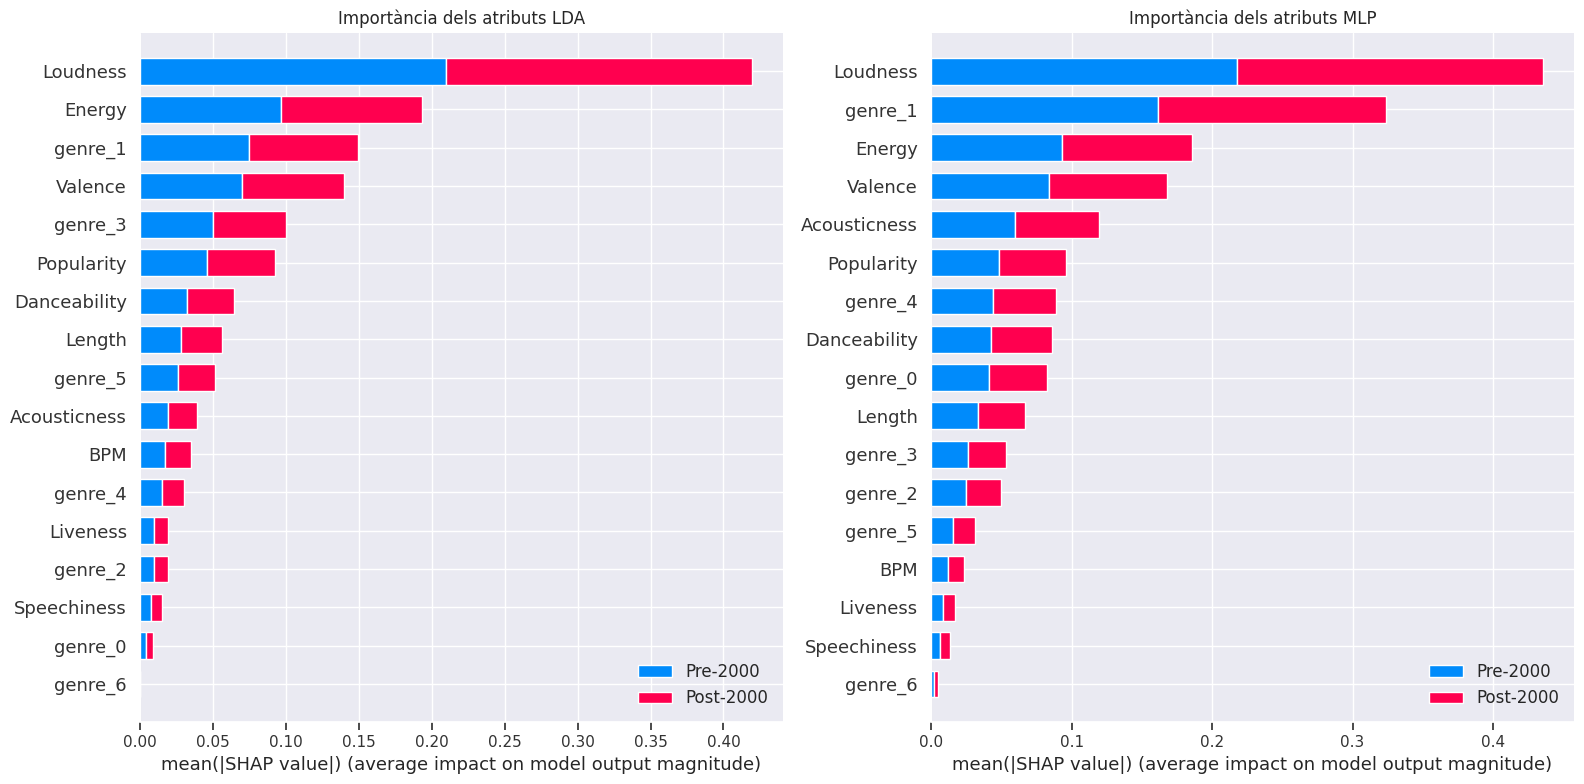

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

plt.sca(axes[0])
shap.summary_plot(shap_values_lda, features=divergent_samples, show=False, class_names=clss, plot_size=None)
axes[0].set_title("Importància dels atributs LDA")

plt.sca(axes[1])
shap.summary_plot(shap_values_mlp, features=divergent_samples, show=False, class_names=clss, plot_size=None)
axes[1].set_title("Importància dels atributs MLP")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()